In [2]:
import sys
sys.path.append('/content/drive/MyDrive/Kode_Skripsi')

In [6]:
!cp /content/drive/MyDrive/Kode_Skripsi/functions.py /content/

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import functions

In [8]:
# Mengambil dataset RT IoT 2022
rt_iot2022 = '/content/drive/MyDrive/Dataset_Skripsi/Dataset_Asli/RT_IOT2022.csv'
df = pd.read_csv(rt_iot2022)

In [9]:
# Memisahkan kolom fitur dan target
X = df.drop(columns=['Attack_type'])
y = df['Attack_type']

# Menyimpan label asli sebelum encoding agar tidak ikut termodifikasi
y_label = y.copy()

# Melakukan encoding label utama (y) sekali untuk StratifiedKFold
y_encoded = LabelEncoder().fit_transform(y.squeeze())

In [10]:
# Menampilkan hasil encoding
functions.show_label_encoding(y, y_encoded)

===== Mapping Label Encoding (Attack_type) =====
            Label_Original  Label_Encoded
            ARP_poisioning              0
            DDOS_Slowloris              1
             DOS_SYN_Hping              2
              MQTT_Publish              3
Metasploit_Brute_Force_SSH              4
             NMAP_FIN_SCAN              5
         NMAP_OS_DETECTION              6
             NMAP_TCP_scan              7
             NMAP_UDP_SCAN              8
       NMAP_XMAS_TREE_SCAN              9
               Thing_Speak             10
                Wipro_bulb             11


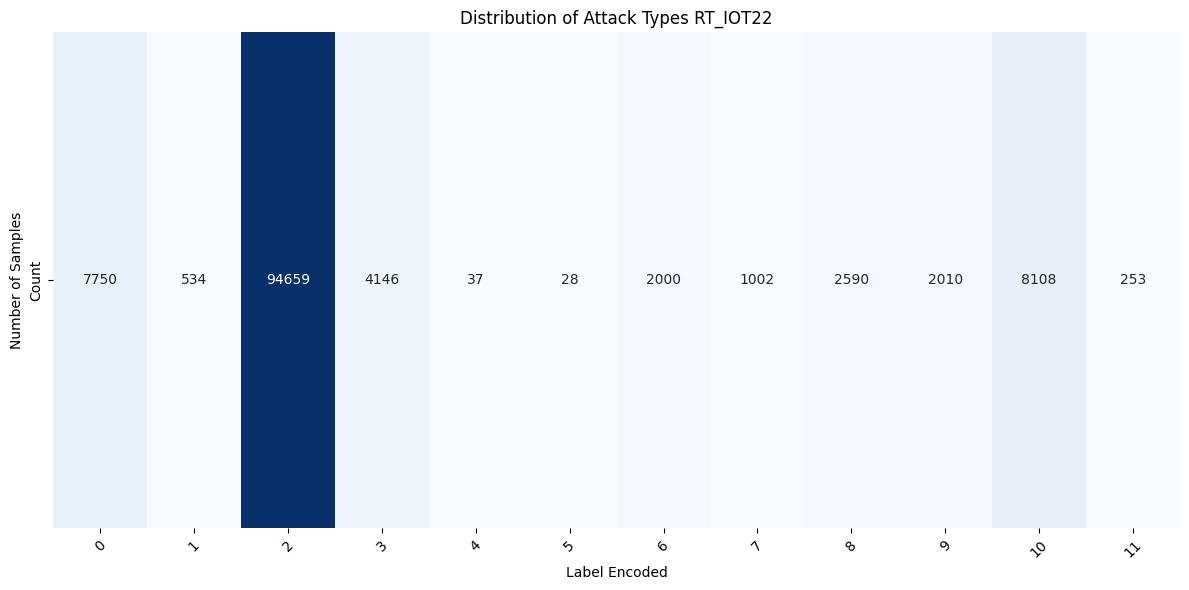

In [11]:
# Memanggil function distribusi kelas
functions.plot_class_distribution(y_label, y_encoded, title="Distribution of Attack Types RT_IOT22")

In [ ]:
# Menghapus semua baris dengan Attack_type yang tidak termasuk serangan siber dan tidak cukup sampel
classes_to_remove = ['Metasploit_Brute_Force_SSH', 'NMAP_FIN_SCAN','MQTT_Publish','Thing_Speak', 'Wipro_bulb','DOS_SYN_Hping']
df = df[~df['Attack_type'].isin(classes_to_remove)]  # Ini menghapus satu BARIS penuh, X dan y sekaligus

# Melakukan undersamplinh untuk serangan ARP_poisioning
df_arp_poisoning = df[df['Attack_type'] == 'ARP_poisioning'].sample(n=5750, random_state=42)

# Mengambil semua sampel untuk selain kelas serangan ARP_poisioning
df_others = df[df['Attack_type'] != 'ARP_poisioning']

# Menggabungkan dataset
df_final = pd.concat([df_arp_poisoning, df_others], axis=0)

# Mengacak dataset
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Menyimpan dataset ke file yang baru
output_path = '/content/drive/MyDrive/Dataset_Skripsi/6_Classes/RT_IOT2022_6Classes.csv'
df_final.to_csv(output_path, index=False)

print(f"Dataset baru berhasil dibuat dan disimpan di {output_path}")